Source:

Surya Kallumadi
Kansas State University
Manhattan, Kansas, USA
surya '@' ksu.edu

Felix Gräßer
Institut für Biomedizinische Technik
Technische Universität Dresden
Dresden, Germany
felix.graesser '@' tu-dresden.de

https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Druglib.com%29

1. urlDrugName (categorical): name of drug
2. condition (categorical): name of condition
3. benefitsReview (text): patient on benefits
4. sideEffectsReview (text): patient on side effects
5. commentsReview (text): overall patient comment
6. rating (numerical): 10 star patient rating
7. sideEffects (categorical): 5 step side effect rating
8. effectiveness (categorical): 5 step effectiveness rating



In [1]:
import pandas as pd 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../../DataSets/drugLibTest_raw.tsv', sep='\t')

# Explore and prepare data

In [4]:
df.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 9 columns):
Unnamed: 0           1036 non-null int64
urlDrugName          1036 non-null object
rating               1036 non-null int64
effectiveness        1036 non-null object
sideEffects          1036 non-null object
condition            1036 non-null object
benefitsReview       1036 non-null object
sideEffectsReview    1036 non-null object
commentsReview       1036 non-null object
dtypes: int64(2), object(7)
memory usage: 73.0+ KB


In [6]:
df.dropna(axis=0, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 0 to 1035
Data columns (total 9 columns):
Unnamed: 0           1036 non-null int64
urlDrugName          1036 non-null object
rating               1036 non-null int64
effectiveness        1036 non-null object
sideEffects          1036 non-null object
condition            1036 non-null object
benefitsReview       1036 non-null object
sideEffectsReview    1036 non-null object
commentsReview       1036 non-null object
dtypes: int64(2), object(7)
memory usage: 80.9+ KB


In [8]:
len(df['condition'].unique())

566

In [9]:
len(df['sideEffects'].unique())

5

In [10]:
len(df['effectiveness'].unique())

5

In [11]:
len(df['sideEffects'].unique())

5

In [12]:
len(df['urlDrugName'].unique())

314

In [13]:
len(df['Unnamed: 0'].unique())  # probably this is unique number of a client

1036

In [14]:
print(df['benefitsReview'].iloc[10])

some pain relief recieved minimized pain when touched


In [15]:
print(df['sideEffectsReview'].iloc[10])

signigicant swelling of hands and feet so significant and uncomfortable that I had to discontinue the medication regimine


In [16]:
df.columns

Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object')

In [17]:
print(df['condition'].iloc[50])

herpes


In [18]:
df.head(1)

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...


In [19]:
def text_length(text):
    text_split = text.split(' ')
    return len(text_split)

In [20]:
text_length(df['sideEffectsReview'].iloc[0])

5

In [21]:
df['sideEffRev_legth'] = df['sideEffectsReview'].apply(text_length)
df['benRev_len'] = df['benefitsReview'].apply(text_length)
df['commRev_len'] = df['commentsReview'].apply(text_length)

In [22]:
df.head(5)

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,sideEffRev_legth,benRev_len,commRev_len
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...,5,26,14
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...,173,160,52
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...,122,94,194
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...,7,46,22
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...,20,60,36


In [23]:
df.drop(columns=['commentsReview', 'benefitsReview', 'sideEffectsReview', 'condition'], axis=0, inplace=True)

In [24]:
df.head(3)

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,sideEffRev_legth,benRev_len,commRev_len
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,5,26,14
1,3724,lamictal,9,Highly Effective,Mild Side Effects,173,160,52
2,3824,depakene,4,Moderately Effective,Severe Side Effects,122,94,194


In [25]:
len(df['sideEffects'].unique())

5

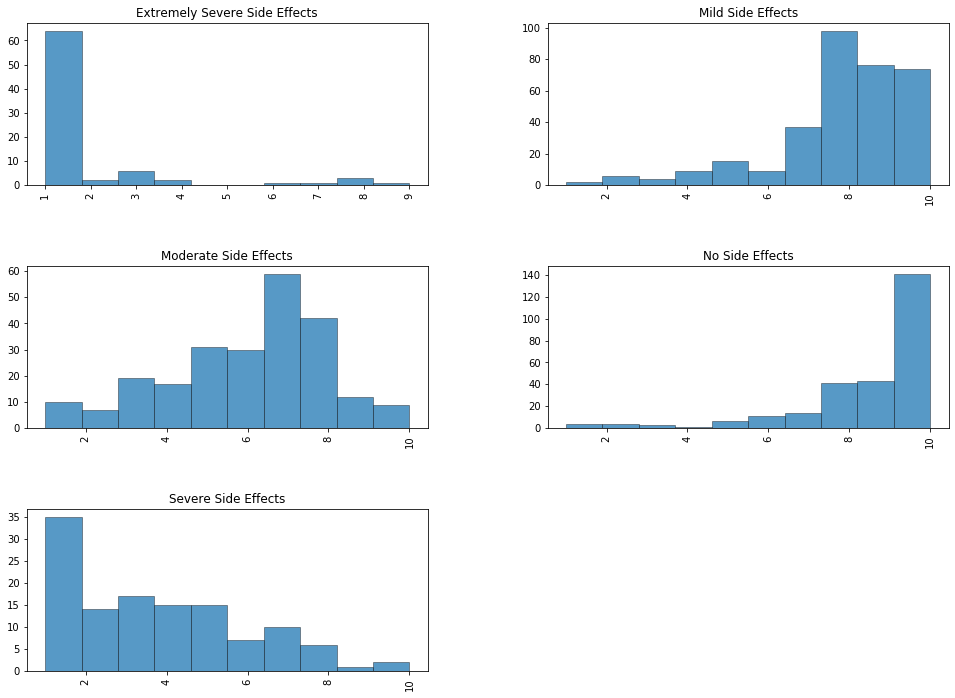

In [26]:
df.hist(column='rating', by='sideEffects', figsize=(16, 12), edgecolor='black', linewidth=0.5, alpha=0.75, bins=10);

In [27]:
len(df['effectiveness'].unique())

5

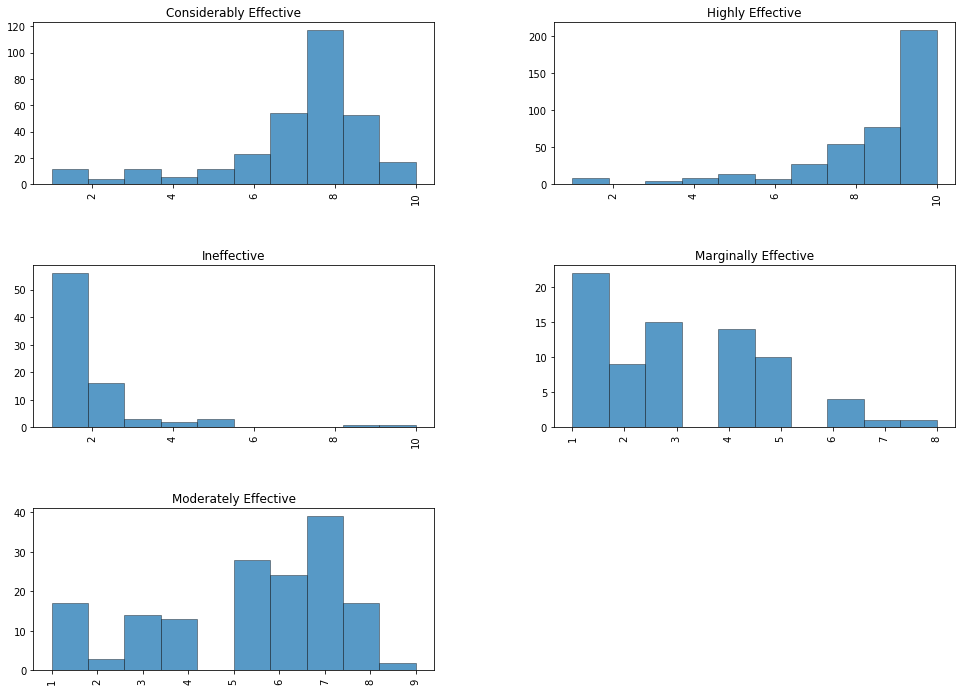

In [28]:
df.hist(column='rating', by='effectiveness', figsize=(16, 12), edgecolor='black', linewidth=0.5, alpha=0.75, bins=10);

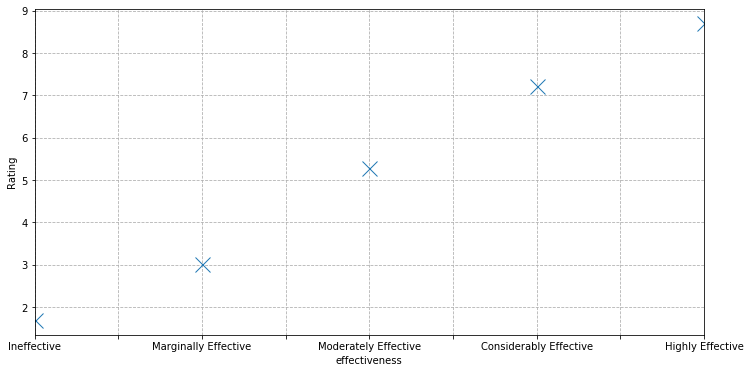

In [29]:
groupped_effect = df.groupby(['effectiveness'], sort=False).mean()['rating'].sort_values()
groupped_effect.plot(marker='x', linestyle='', markersize=15, figsize=(12, 6))
plt.grid(linestyle='--')
plt.ylabel('Rating');

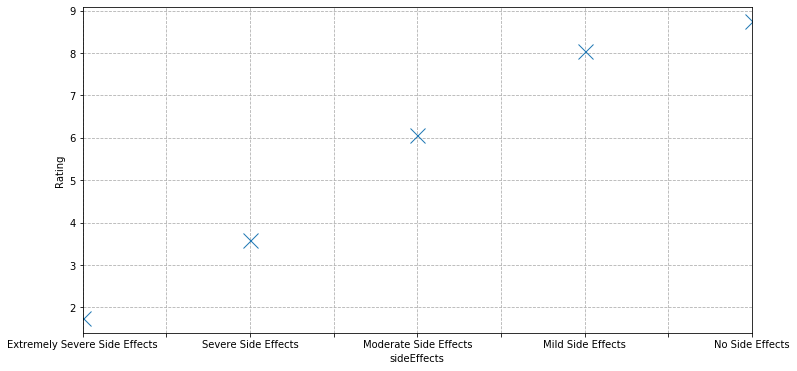

In [30]:
groupped_sideEff = df.groupby(['sideEffects'], sort=False).mean()['rating'].sort_values()
groupped_sideEff.plot(marker='x', linestyle='', markersize=15, figsize=(12, 6))
plt.grid(linestyle='--')
plt.ylabel('Rating');

In [31]:
df.head(2)

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,sideEffRev_legth,benRev_len,commRev_len
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,5,26,14
1,3724,lamictal,9,Highly Effective,Mild Side Effects,173,160,52


In [32]:
df.groupby(['sideEffRev_legth'], sort=False).mean()['rating'].iloc[1:10]

sideEffRev_legth
173    9.000000
122    6.000000
7      7.560000
20     8.090909
11     6.928571
37     5.125000
14     7.000000
15     6.857143
77     3.500000
Name: rating, dtype: float64

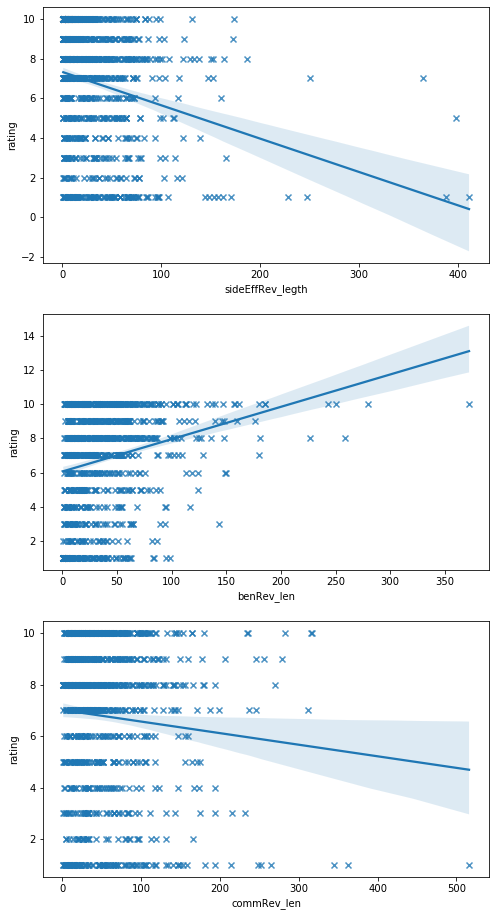

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 16))



sns.regplot(x='sideEffRev_legth', y='rating', data=df, ax=ax1, marker='x')

sns.regplot(x='benRev_len', y='rating', data=df, ax=ax2, marker='x')

sns.regplot(x='commRev_len', y='rating', data=df, ax=ax3, marker='x')

#ax5.plot(df['commRev_len'], df['rating'], marker='x', linestyle='', markersize=15)


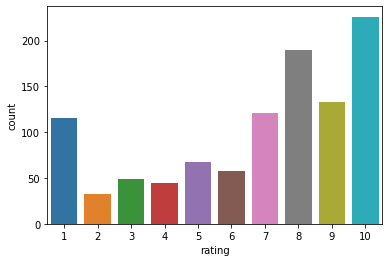

In [34]:
sns.countplot(x='rating', data=df)

Ok, the DataSet is unballanced.

In [35]:
df.head(1)

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,sideEffRev_legth,benRev_len,commRev_len
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,5,26,14


In [36]:
df['effectiveness'].unique()

array(['Considerably Effective', 'Highly Effective',
       'Moderately Effective', 'Marginally Effective', 'Ineffective'],
      dtype=object)

In [37]:
df['effectiveness'] = df['effectiveness'].map({'Highly Effective':4, 'Considerably Effective':3,
                                              'Moderately Effective':2, 'Marginally Effective':1,
                                              'Ineffective':0})

In [38]:
df.head(3)

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,sideEffRev_legth,benRev_len,commRev_len
0,1366,biaxin,9,3,Mild Side Effects,5,26,14
1,3724,lamictal,9,4,Mild Side Effects,173,160,52
2,3824,depakene,4,2,Severe Side Effects,122,94,194


In [39]:
df['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Moderate Side Effects', 'Extremely Severe Side Effects'],
      dtype=object)

In [40]:
df['sideEffects'] = df['sideEffects'].map({'No Side Effects':4, 'Mild Side Effects':3,
                                              'Moderate Side Effects':2, 'Severe Side Effects':1,
                                              'Extremely Severe Side Effects':0})

In [41]:
df.head(3)

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,sideEffRev_legth,benRev_len,commRev_len
0,1366,biaxin,9,3,3,5,26,14
1,3724,lamictal,9,4,3,173,160,52
2,3824,depakene,4,2,1,122,94,194


# Split train Data

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df[['effectiveness', 'sideEffects']]

In [44]:
y = df['rating']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Logistic regression

In [46]:
import matplotlib.pyplot as plt

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
log_regr_class = LogisticRegression(max_iter=1000)

In [49]:
log_regr_class.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [50]:
log_regr_predict = log_regr_class.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print(classification_report(y_test, log_regr_predict))

              precision    recall  f1-score   support

           1       0.56      0.81      0.66        43
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00        14
           5       0.18      0.24      0.21        17
           6       0.00      0.00      0.00        21
           7       0.04      0.03      0.03        38
           8       0.44      0.67      0.53        70
           9       0.29      0.19      0.23        37
          10       0.67      0.89      0.77        72

    accuracy                           0.46       342
   macro avg       0.22      0.28      0.24       342
weighted avg       0.35      0.46      0.39       342



/home/raketa/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/raketa/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/raketa/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Let's reduce number of marks in rating:

In [53]:
df_fixed = df[(df['rating'] == 1) | (df['rating'] == 5) | (df['rating'] == 10)]

In [54]:
df_fixed['rating'].unique()

array([10,  1,  5])

In [55]:
X = df_fixed[['effectiveness', 'sideEffects']]
y = df_fixed['rating']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [57]:
log_regr_fixed = LogisticRegression(max_iter=1000)

In [58]:
log_regr_fixed.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [59]:
log_regr_fixed_prediction = log_regr_fixed.predict(X_test)

In [60]:
print(classification_report(y_test, log_regr_fixed_prediction))

              precision    recall  f1-score   support

           1       0.89      0.91      0.90        35
           5       0.74      0.58      0.65        24
          10       0.93      0.97      0.95        76

    accuracy                           0.89       135
   macro avg       0.85      0.82      0.83       135
weighted avg       0.88      0.89      0.88       135



# Rand Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rand_cl = RandomForestClassifier()

In [63]:
rand_cl.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
rand_cl_prediction = rand_cl.predict(X_test)

In [65]:
print(classification_report(y_test, rand_cl_prediction))

              precision    recall  f1-score   support

           1       0.86      0.89      0.87        35
           5       0.62      0.62      0.62        24
          10       0.95      0.93      0.94        76

    accuracy                           0.87       135
   macro avg       0.81      0.81      0.81       135
weighted avg       0.87      0.87      0.87       135

